# Panoramic Stitching

Kevin Walchko, created 10 Dec 2016

--------

Generating a panoramic image by stitching a group of smaller, overlapping images together has become a common practice. For example, Google Photos will automatically search through your library of photos and offer up panoramics it can create. Here we will learn how that process works.

## Objectices

- understand how to stitch multiple, overlapping images together and produce a panorama

## References

- [OpenCV stitcher docs](https://docs.opencv.org/trunk/d1/d46/group__stitching.html)
- [Wikipedia: Image stitching](https://en.wikipedia.org/wiki/Image_stitching)
- [misc](https://github.com/dev-sidd-16/OpenCV-Panorama-Stitch)
- [parking lot images](https://github.com/Manasi94/Image-Stitching)

# Stitching

Image stitching or photo stitching is the process of combining multiple photographic images with overlapping fields of view to produce a segmented panorama or high-resolution image. Commonly performed through the use of computer software, most approaches to image stitching require nearly exact overlaps between images and identical exposures to produce seamless results, although some stitching algorithms actually benefit from differently exposed images by doing HDR (High Dynamic Range) imaging in regions of overlap. Some digital cameras can stitch their photos internally. Image stitching is widely used today in applications such as high resolution photo mosaics in digital maps or medical imaging.

## Process

1. Finding feature in a group of images. There are a variety of feature detectors available.
1. Compute decriptors from the images using the keypoints from the previous step.
1. Matching the descriptors between two adjacent/overlapping images. Algorithms like Fast Library for Approximate Nearest Neighbors (FLANN) find the best matches for adjacent image features
1. Using RANSAC to estimate the homography matrix using the matched feature descriptors
1. Warping the images based on the homography matrix to create the panoramic image

    
## RANSAC

RANdom SAmple Consensus (RANSAC) is a general parameter estimation approach designed to cope with a large proportion of outliers in the input data.

A simple example is fitting of a line in two dimensions to a set of observations. Assuming that this set contains both inliers, i.e., points which approximately can be fitted to a line, and outliers, points which cannot be fitted to this line, a simple least squares method for line fitting will generally produce a line with a bad fit to the inliers. The reason is that it is optimally fitted to all points, including the outliers. RANSAC, on the other hand, can produce a model which is only computed from the inliers, provided that the probability of choosing only inliers in the selection of data is sufficiently high, however, there is no guarantee for this situation.

![](pics/ransac-1.png)
![](pics/ransac-2.png)

## OpenCV 3.3

![](pics/StitchingPipeline.jpg)

This figure illustrates the stitching module pipeline implemented in the Stitcher class. Using that class it's possible to configure/remove some steps, i.e. adjust the stitching pipeline according to the particular needs. All building blocks from the pipeline are available in the detail namespace, one can combine and use them separately.

## Mars Rover

The Curiosity rover is well known for generating panoramic views of its surroundings by stitching images together. 

![](pics/mars-rover.gif)

## Satellite Imagery

It is common practice to stitch together satellite images. Commerically, they are used for a variety of applications, like deforestation studies, crop studies, beach errosion, etc. There are also numerous military applications like monitoring Russian ICBM sites, Chinese Naval bases, etc.

![](pics/satellite_combine.png)

![](pics/satellite.jpg)

## Airborne ISR

Airborne imagery (Tac Recce or tactical recon), we typically merge together imagery. Below is a product from a British Torando using a [RAPTOR Pod](https://en.wikipedia.org/wiki/RAPTOR). I worked with these in Afghanistan and they made lots of amazing data products.

![](pics/tac_recce.jpg)

# Setup

In [1]:
%matplotlib inline

In [8]:
from __future__ import print_function
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import cv2
from math import sqrt
import pylab                                   
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

## My Home Office

Yes, it is  a little messy, but ...

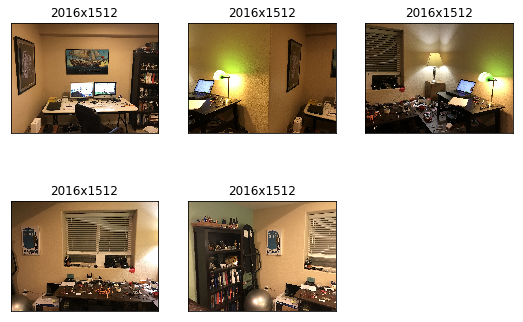

In [9]:
fname = [
    'stitch_pics/IMG_1508.JPG',
    'stitch_pics/IMG_1509.JPG',
    'stitch_pics/IMG_1510.JPG',
    'stitch_pics/IMG_1511.JPG',
    'stitch_pics/IMG_1512.JPG'
]

imgs2 = []
for f in fname:
    image = cv2.imread(f)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    imgs2.append(image)

# display the individual images
plt.figure(figsize=(9,6))  # width, height
for i, img in enumerate(imgs2):
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    h,w,_ = img.shape
    plt.title('{}x{}'.format(w,h))
    plt.xticks(())
    plt.yticks(())

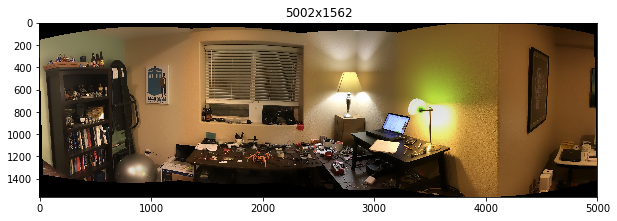

In [10]:
stitcher = cv2.createStitcher(True)
err, result = stitcher.stitch(imgs2)
if err:
    print("crap!")
    
# save a high res copy to look at
ans = cv2.cvtColor(result,cv2.COLOR_RGB2BGR)
cv2.imwrite('office.png', ans)

# display
plt.imshow(result);
h,w,_ = ans.shape
plt.title('{}x{}'.format(w,h));

# City

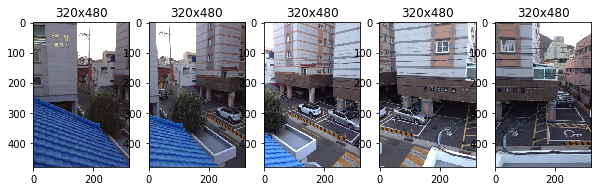

In [16]:
fname = [
    'stitching_img/S1.jpg',
    'stitching_img/S2.jpg',
    'stitching_img/S3.jpg',
    'stitching_img/S4.jpg',
    'stitching_img/S5.jpg'
]

imgs = []
for f in fname:
    image = cv2.imread(f)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    imgs.append(image)

for i, img in enumerate(imgs):
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    h,w,_ = img.shape
    plt.title('{}x{}'.format(w,h))

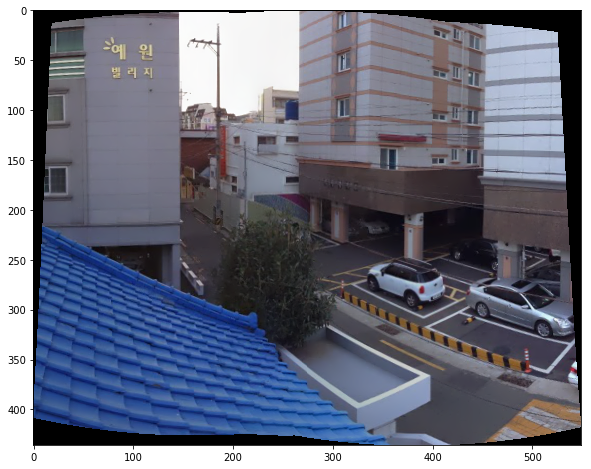

In [15]:
stitcher = cv2.createStitcher(True)
ret, result = stitcher.stitch(imgs)
if ret:
    print('Crap!')
plt.imshow(result);

So what happened? Honestly I don't know. I *think* OpenCV failed to find enough keypoint matches in the last two images relative to the image before. Therefore it threw out those results. Unfortunately there are no error printed, so I am just guessing.

# Denver Comic Con 2017

In [17]:
def stitch_imgs(imgs, gpu=False):
    """Not sure making a function saves us anything."""
    stitcher = cv2.createStitcher(gpu)
    err, result = stitcher.stitch(imgs)
    return result

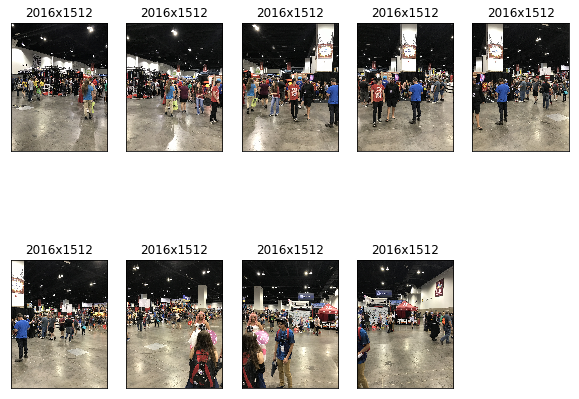

In [18]:
fname = map(lambda x:'comic_con/IMG_26{}.JPG'.format(x), range(28,37))
    
conimgs = []
for f in fname:
    image = cv2.imread(f)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    conimgs.append(image)

for i, img in enumerate(conimgs):
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    w,h,_ = img.shape
    plt.title('{}x{}'.format(w,h))
    plt.xticks(())
    plt.yticks(())

In [19]:
pan = stitch_imgs(conimgs, True)

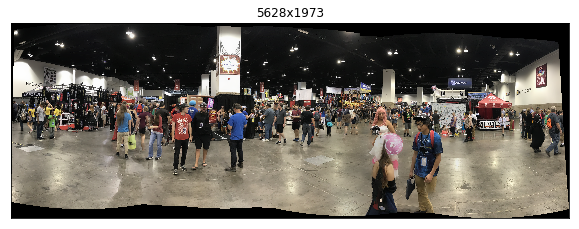

In [20]:
plt.figure(figsize=(10,6))  # width, height
plt.imshow(pan);
h,w,_ = pan.shape
plt.title('{}x{}'.format(w,h))
plt.xticks(())
plt.yticks(());

In [21]:
# save a high res copy to look at
ans = cv2.cvtColor(pan,cv2.COLOR_RGB2BGR)
cv2.imwrite('comic_con.png', ans)

True

Now, the pano has some issues. But you need to realize the environment was very dynamic (people moving) and I probably wasn't as fast or careful (trying to keep the camera in one place and just turn it nicely) taking the pictures. 

Take a look at the individual images, try to stitch them together with your eye. Try to match the background static objects (e.g., pillars, bannars, etc) that don't move. This will help you understand the dynamic object errors better.

My iPhone however, did a better job and using the sensors embedded in it, helps me take a faster, nicer picture. Here is the result:

![](pics/iphone_pano.JPG)

We see the same scene with the same static background objects, however, there is a noticable difference in the dynamic parts (people) between the two sets of images. I tried to collect the individual images and iPhone pano as close together in time as I could so you could compare them better, but ...

# Even Google Makes Errors

Take a look at these dynamic situations where Google Photos automatically created panos from some of my images. Do you see any issues? You might have to open the images up and zoom in to see the errors better.

![](errors/error1.jpg)
![](errors/error2.jpg)

How could you fix this problem?

# Exercise

- Try taking a couple of pictures as described in this lesson and stitch them together to form a pano. Remember the images have to have some overlap, the more the better, so key points can be found between multiple images.

# Questions

1. What are the steps to produce a panoramic image from a group of images
1. What are some requirements in image collection to achieve good results?
1. What is RANSAC?
1. Why are the black borders on the pano image all jagged or curvey? Why are they not straight lines?
1. Why does the Apple pano look better? *Hint:* no, it is not better software.


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.